In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('tip-amount.xlsx')

In [ ]:
data.head()

,Meal,Observed total bill(xi),Observed tip amount(yi)
0,1,34,5
1,2,108,17
2,3,64,11
3,4,88,8
4,5,99,14


<Axes: >

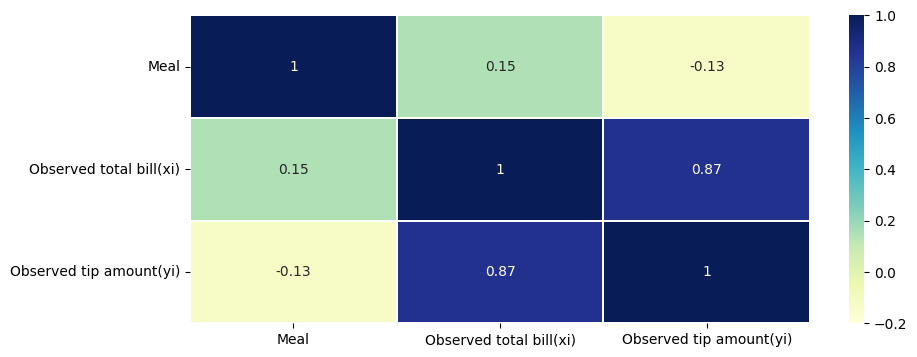

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, vmin=-.2, vmax=1, annot=True, linewidths=0.2, cmap='YlGnBu')

In [ ]:
y = data['Observed tip amount(yi)']
X = data.drop(['Observed tip amount(yi)'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [ ]:
model = lr.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
X_test

,Meal,Observed total bill(xi)
0,1,34
1,2,108


In [ ]:
predictions

array([ 7.72756456, 15.46875446])

In [ ]:

# Use the trained model to predict the tip amount for the new data point

new_data_point = pd.DataFrame({'Meal':[4,7],'Observed total bill(xi)': [99,150]})
predicted_tip_amount = model.predict(new_data_point)

predicted_tip_amount

array([12.67292053, 15.98837209])

In [ ]:
from sklearn.metrics import mean_squared_error
print ('MSE is: \n', mean_squared_error(y_test, predictions))

MSE is: 
 4.892160668179491


In [ ]:
from sklearn.metrics import r2_score
print ('R squared value is: \n', r2_score(y_test, predictions))

R squared value is: 
 0.8641066481061255


In [ ]:
https://www.angela1c.com/projects/tips-project-files/part2/
tips.csv


Advertising data


Mean Absolute Error (MAE): 1.4607567168117603
Mean Squared Error (MSE): 3.1740973539761033
R-squared (R²): 0.899438024100912


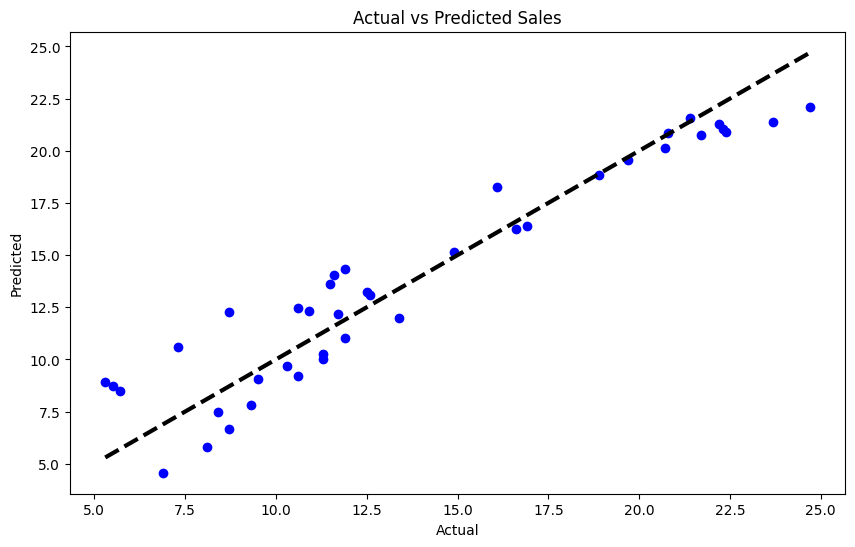

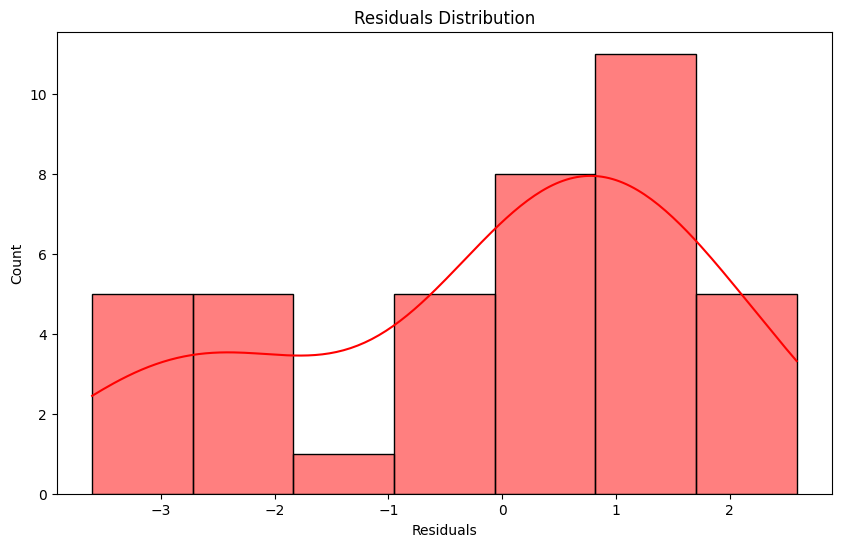

           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Advertising.csv'
data = pd.read_csv(file_path)

# Step 1: Preprocess the Data
data = data.drop(columns=['Unnamed: 0'])

# Step 2: Split the Data
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = model.predict(X_test)

# model.coef_
# The coefficient is a factor that describes the relationship with an unknown variable.
# Example: if x is a variable, then 2x is x two times. x is the unknown variable, and the number 2 is the coefficient.
# Weight: 0.00755095
# Volume: 0.00780526

# These values tell us that if the weight increase by 1kg, the CO2 emission increases by 0.00755095g.
# And if the engine size (Volume) increases by 1 cm3, the CO2 emission increases by 0.00780526 g.

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales')
plt.show()

# Visualize the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='red')
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

# Print the model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Understanding the Evaluation Metrics
Mean Absolute Error (MAE):

MAE is the average absolute difference between the actual and predicted values. It gives an idea of how much the predictions deviate from the actual values on average.
In our case, the MAE of
1.46
1.46 means that, on average, our predictions are off by about 1.46 units of sales.
Mean Squared Error (MSE):

MSE is the average squared difference between the actual and predicted values. It penalizes larger errors more than MAE.
An MSE of
3.17
3.17 indicates that the model's predictions are relatively close to the actual values, but it also highlights the presence of some larger errors.
R-squared (R²):

R² is the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where a higher value indicates a better fit.
An R² of
0.899
0.899 means that approximately 89.9% of the variance in sales can be explained by the advertising budgets for TV, radio, and newspaper.
Interpretation and Understanding
The high R² value (0.899) suggests that the model explains a significant portion of the variance in sales, indicating a good fit.
The relatively low MAE (1.46) and MSE (3.17) suggest that the model makes reasonably accurate predictions.
This model can be used to predict sales based on advertising budgets with a fair degree of confidence. However, it's essential to remember that while the model performs well on this dataset, its performance on new data may vary, and further validation may be necessary.

In [ ]:
new_data_point = pd.DataFrame({'Meal':[4,7],'Observed total bill(xi)': [99,150]})
predicted_tip_amount = model.predict(new_data_point)

Mean Absolute Error (MAE): 0.875
Mean Squared Error (MSE): 0.8125
R-squared (R²): 0.9427312775330396


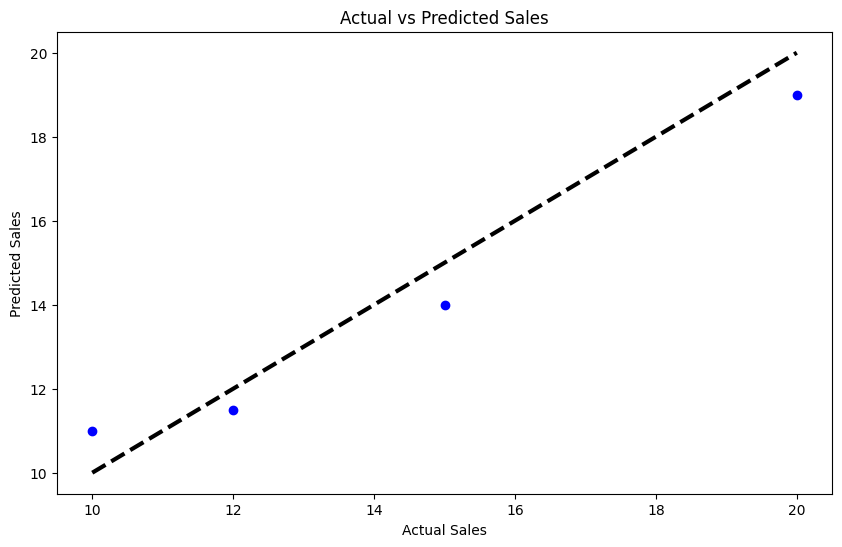

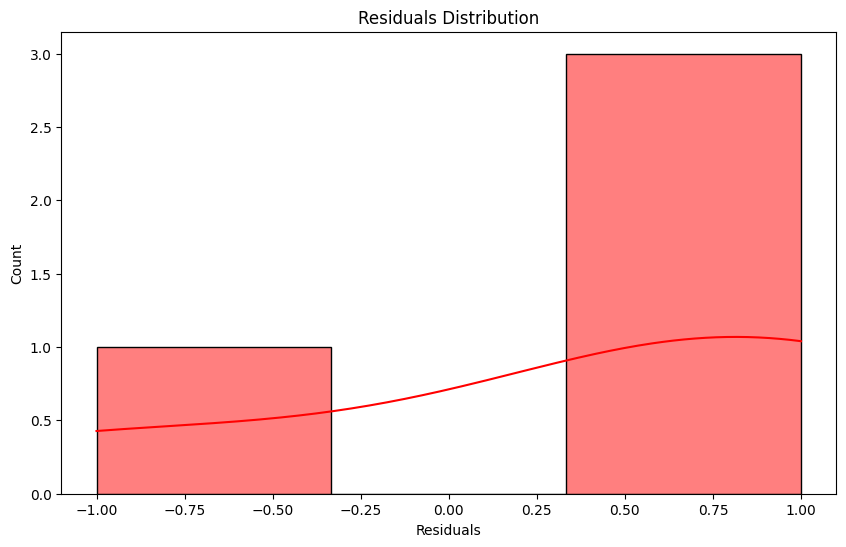

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothetical data
y_test = pd.Series([10, 12, 15, 20])
y_pred = pd.Series([11, 11.5, 14, 19])

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Visualize the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='red')
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()


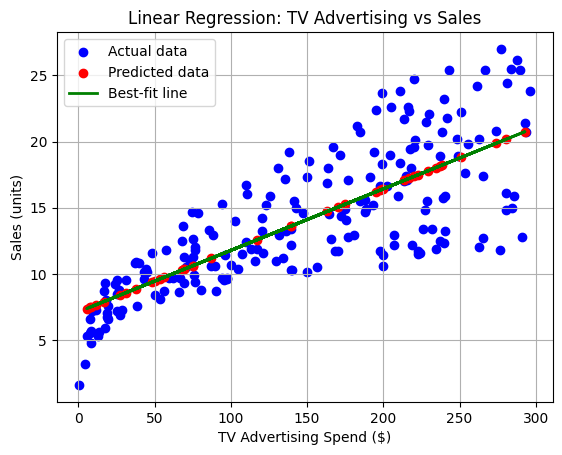

In [ ]:
# Extracting independent and dependent variables
X = data[['TV']].values
y = data['Sales'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

# Plotting the results
plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X_test, y_pred, color='red', label='Predicted data')
plt.plot(X_test, model.predict(X_test), color='green', linewidth=2, label='Best-fit line')
plt.title('Linear Regression: TV Advertising vs Sales')
plt.xlabel('TV Advertising Spend ($)')
plt.ylabel('Sales (units)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import Ridge,Lasso
# Extracting independent and dependent variables
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Ridge regression model
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength (lambda)
ridge.fit(X_train, y_train)

# Predicting on test data
y_pred = ridge.predict(X_test)

# Calculating and printing the RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Ridge Regression RMSE: {rmse}")

# Printing the coefficients
print("Ridge Regression Coefficients:")
for feature, coef in zip(['TV', 'Radio', 'Newspaper'], ridge.coef_):
    print(f"{feature}: {coef}")

Ridge Regression RMSE: 1.7815989481622216
Ridge Regression Coefficients:
TV: 0.04472953008891156
Radio: 0.18918868583785295
Newspaper: 0.002762870547339336


In [ ]:
#  Creating a Lasso regression model
lasso = Lasso(alpha=1.0)  # alpha is the regularization strength (lambda)
lasso.fit(X_train, y_train)

# Predicting on test data
y_pred = lasso.predict(X_test)

# Calculating and printing the RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Lasso Regression RMSE: {rmse}")

# Printing the coefficients
print("Lasso Regression Coefficients:")
for feature, coef in zip(['TV', 'Radio', 'Newspaper'], lasso.coef_):
    print(f"{feature}: {coef}")

Lasso Regression RMSE: 1.7730458272046827
Lasso Regression Coefficients:
TV: 0.04463068103049603
Radio: 0.1853504792957462
Newspaper: 0.0014219562357348696
